In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
sentiment_raw = pd.read_csv(r'C:\Users\owner\projects\Thinkful_Projects\sentiment labelled sentences\yelp_labelled.txt', encoding='ISO-8859-1', delimiter = '\t', header=None)
sentiment_raw.columns = ['review', 'score']
#sentiment_raw.iloc[200:500, 0]

# Version 1: One Word

In [3]:
keywords = ['not']

for word in keywords:
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
      ' ' +  str(word) + ' ',
        case=False
   )      

In [4]:
#checks if it is negative, False means positive
sentiment_raw['score'] =(sentiment_raw['score']==0)

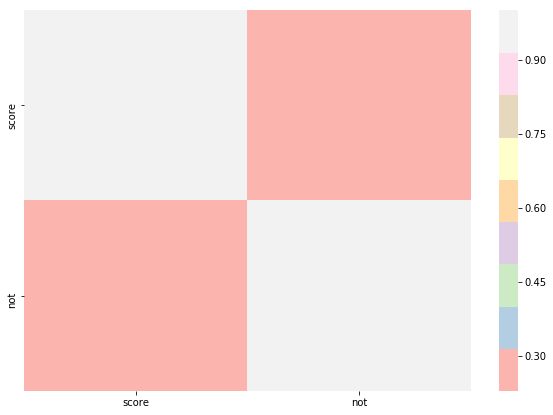

In [5]:
plt.figure(figsize = (10,7))
sns.heatmap(sentiment_raw.corr(), cmap = 'Pastel1')

In [6]:
data=sentiment_raw[keywords]
target=sentiment_raw['score']

In [7]:
from sklearn.naive_bayes import BernoulliNB

bern = BernoulliNB()
bern.fit(data, target)

y_pred = bern.predict(data)
print('The number of mislabelled points out of a total {} points: {}'.format(
    data.shape[0], 
    (target != y_pred).sum()
))

The number of mislabelled points out of a total 1000 points: 431


# Confusion Matrix

In [8]:
matrix = pd.DataFrame(y_pred)
matrix.columns = ['predicted']
matrix['actual'] = sentiment_raw['score']
matrix.head()

#actually not a negative comment, i.e. positive
print('Actual NO:', len(matrix[matrix.actual ==False]), ' |',
      'Predicted NO:', len(matrix.loc[(matrix['predicted'] == False) & (matrix['actual'] ==False)]), '|',
      'Predicted Yes:', len(matrix.loc[(matrix['predicted'] == True) & (matrix['actual'] ==False)]), ' |',
      'Specitivity:', len(matrix.loc[(matrix['predicted'] == False) & (matrix['actual'] ==False)]) / len(matrix[matrix.actual ==False]), 'or negatives identified correctly')
print('Type I error or false positives:', len(matrix.loc[(matrix['predicted'] == True) & (matrix['actual'] ==False)]) / len(matrix[matrix.actual ==False]),'\n')
      
print('Actual YES:', len(matrix[matrix.actual ==True]), '|',
      'Predicted NO:', len(matrix.loc[(matrix['predicted'] == False) & (matrix['actual'] ==True)]), '|',
      'Predicted YES:', len(matrix.loc[(matrix['predicted'] == True) & (matrix['actual'] ==True)]), '|',
      'Sensitivity:', len(matrix.loc[(matrix['predicted'] == True) & (matrix['actual'] ==True)]) / len(matrix[matrix.actual ==True]), 'or positives identified correctly')
print('Type II error or false negatives:', len(matrix.loc[(matrix['predicted'] == False) & (matrix['actual'] ==True)]) /len(matrix[matrix.actual ==True]), '\n')

print('Accuracy if guessed at random: 500 /100 = 0.5')

Actual NO: 500  | Predicted NO: 484 | Predicted Yes: 16  | Specitivity: 0.968 or negatives identified correctly
Type I error or false positives: 0.032 

Actual YES: 500 | Predicted NO: 415 | Predicted YES: 85 | Sensitivity: 0.17 or positives identified correctly
Type II error or false negatives: 0.83 

Accuracy if guessed at random: 500 /100 = 0.5


# Train / Test Groups(Holdout Groups)

In [9]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bern.fit(data, target).score(data, target)))

With 20% Holdout: 0.55
Testing on Sample: 0.569


# Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(bern, data, target, cv=10)

array([0.56, 0.56, 0.58, 0.52, 0.59, 0.59, 0.59, 0.57, 0.56, 0.57])

# Version 2: more words

In [11]:
keywords_larger = ['not', 'not good','angry', 'never', 'NEVER', 'bad','disappointing', 'poor', 'worst', 'no way','nasty', 'misleading']

for word in keywords_larger:
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
      ' ' +  str(word) + ' ',
        case=False
   ) 
    
data_larger=sentiment_raw[keywords_larger]

bern.fit(data_larger, target)

y_pred_two = bern.predict(data_larger)
print('The number of mislabelled points out of a total {} points: {}'.format(
    data_larger.shape[0], 
    (target != y_pred_two).sum()
))

The number of mislabelled points out of a total 1000 points: 394


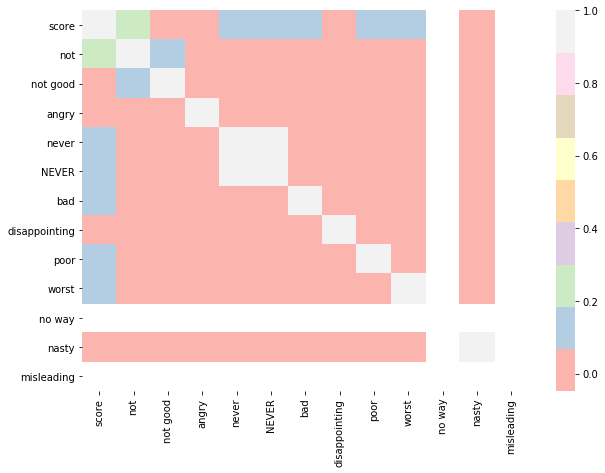

In [12]:
plt.figure(figsize = (10,7))
sns.heatmap(sentiment_raw.corr(), cmap = 'Pastel1')

In [13]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(target, y_pred_two)
print(matrix)

[[480  20]
 [374 126]]


In [14]:
print('Specitivity or negatives correctly identified:', matrix[0,0] / (matrix[0,0] + matrix[0,1]), 'type I error or false positives:', matrix[0,1] / (matrix[0,0] + matrix[0,1]))
print('Sensitivity or positives correctly identified:', matrix[1,1] / (matrix[1,0] + matrix[1,1]), 'type II error or false negatives', matrix[1,0] /(matrix[1,0] + matrix[1,1]))      

Specitivity or negatives correctly identified: 0.96 type I error or false positives: 0.04
Sensitivity or positives correctly identified: 0.252 type II error or false negatives 0.748


In [15]:
cross_val_score(bern, data_larger, target, cv=10)

array([0.66, 0.57, 0.64, 0.56, 0.61, 0.62, 0.62, 0.61, 0.57, 0.58])

# Version 3: Even More Words

In [16]:
negative_reviews = sentiment_raw[sentiment_raw.score ==True]
positive_reviews = sentiment_raw[sentiment_raw.score ==False]

only_reviews = negative_reviews.iloc[:, 0]
only_positive = positive_reviews.iloc[:, 0]



#Counts the most frequent words in negative and positive reviews
#[Counter(" ".join(only_reviews).split()).most_common(300)[x][0] for x in range(0, 300)]
#Counter(" ".join(only_positive).split()).most_common(200)

In [17]:
#keywords_even_larger =['not', 'but', 'don\'t','never', 'wasn\'t', 'didn\'t', 'again', 'better', 'another', 'too', 'than', 'slow', 'worst', 'took', 'bit', 'way', 'waited', 'ordered', 'over', 'asked', 'can\'t', 'bad', 'barely']
keywords_even_larger = [Counter(" ".join(only_reviews).split()).most_common(600)[x][0] for x in range(0, 599)]
 
for word in keywords_even_larger:
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
      ' ' +  str(word) + ' ',
        case=False
   ) 
    
data_even_larger=sentiment_raw[keywords_even_larger]

bern.fit(data_even_larger, target)

y_pred_three = bern.predict(data_even_larger)
print('The number of mislabelled points out of a total {} points: {}'.format(
    data_even_larger.shape[0], 
    (target != y_pred_three).sum()
))


The number of mislabelled points out of a total 1000 points: 234


# Confusion Matrix

In [18]:
matrix_one = confusion_matrix(target, y_pred_three)
print(matrix_one)

[[448  52]
 [182 318]]


In [19]:
print('Specificity or negatives correctly identified:', matrix_one[0,0] / (matrix_one[0,0] + matrix_one[0,1]), 'type I error or false positives:', matrix_one[0,1] / (matrix_one[0,0] + matrix_one[0,1]))
print('Sensitivity or positives correctly identified:', matrix_one[1,1] / (matrix_one[1,0] + matrix_one[1,1]), 'type II error or false negatives', matrix_one[1,0] /(matrix_one[1,0] + matrix_one[1,1]))      

Specificity or negatives correctly identified: 0.896 type I error or false positives: 0.104
Sensitivity or positives correctly identified: 0.636 type II error or false negatives 0.364


# Precion, Recall, and F1 Score

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

#precision = TP/(TP + FP)
precision_score(target, y_pred_three)

0.8594594594594595

In [21]:
#recall = TP/(TP+FN)
recall_score(target, y_pred_three)

0.636

In [22]:
f1_score(target, y_pred_three)

0.7310344827586207

# Cross-Validation

In [23]:
cross_val_score(bern, data_even_larger, target, cv=10)

array([0.76, 0.66, 0.77, 0.66, 0.61, 0.64, 0.66, 0.7 , 0.68, 0.74])

# Version 4: Positive Words

In [24]:
#positive =['good', 'very', 'great', 'really', 'friendly', 'nice', 'love', 'best', 'definitely', 'always', 'excellent', 'happy', 'amazing', 'delicious', '!', 'awesome', 'loved', 'wonderful', 'fantastic', 'well', 'atmosphere', 'super', 'everything']
positive = [Counter(" ".join(only_positive).split()).most_common(600)[x][0] for x in range(0, 599)]
for word in positive:
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
      str(word) + ' ',
        case=False
   ) == False
    
    
data_positive=sentiment_raw[positive]

bern.fit(data_positive, target)

y_pred_four = bern.predict(data_positive)
print('The number of mislabelled points out of a total {} points: {}'.format(
    data_positive.shape[0], 
    (target != y_pred_four).sum()
))


The number of mislabelled points out of a total 1000 points: 208


In [25]:
matrix_two = confusion_matrix(y_pred_four, target)
print(matrix_two)

[[354  62]
 [146 438]]


In [26]:
print('Specificity or negatives correctly identified:', matrix_two[0,0] / (matrix_two[0,0] + matrix_two[0,1]), 'type I error or false positives:', matrix_two[0,1] / (matrix_two[0,0] + matrix_two[0,1]))
print('Sensitivity or positives correctly identified:', matrix_two[1,1] / (matrix_two[1,0] + matrix_two[1,1]), 'type II error or false negatives', matrix_two[1,0] /(matrix_two[1,0] + matrix_two[1,1]))      

Specificity or negatives correctly identified: 0.8509615384615384 type I error or false positives: 0.14903846153846154
Sensitivity or positives correctly identified: 0.75 type II error or false negatives 0.25


In [27]:
cross_val_score(bern, data_positive, target, cv=10)

array([0.67, 0.68, 0.76, 0.74, 0.66, 0.7 , 0.75, 0.73, 0.64, 0.85])

# Precion, Recall, and F1 Score

In [28]:
precision_score(target, y_pred_four)

0.75

In [29]:
#same as sensitivity
recall_score(target, y_pred_four)

0.876

In [30]:
f1_score(target, y_pred_four)

0.8081180811808119

# Version 5: Combination

In [31]:
neg_missed = ['slow', 'Blah', 'the worst', 'blow', 'poor service', 'stupid', 'sucks', 'disgust', 'the worst', 'excuse', 'meh', 'appalling', 'bland', 'unsatisfying', 'disappointing ',  'rude', 'rarely', 'disappointed', 'overpriced', 'aren\'t as good', 'unprofessional', 'sad', 'disgusting', 'lacked', 'ridiculous',  'horrible', 'dirty', 'disappointment', 'below average', 'closed down', 'some place else' , 'awful']
for word in neg_missed:
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
      str(word),
        case=False
   )
    

In [32]:
positive_missed = ['could not be happier', 'a lot', 'delight', 'the rigth amount', 'perfect', 'perfectly', 'definitely go back', 'amazing',  '!', 'one of the better', 'Will go back', 'worth', 'will return', 'awesome', 'good', ]
for word in positive_missed:
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
      str(word),
        case=False
   ) == False

In [33]:
data_combo = sentiment_raw[keywords_even_larger + positive + neg_missed + positive_missed]
bern.fit(data_combo, target)

y_pred_five = bern.predict(data_combo)
print('The number of mislabelled points out of a total {} points: {}'.format(
    data_combo.shape[0], 
    (target != y_pred_five).sum()
))


The number of mislabelled points out of a total 1000 points: 161


In [34]:
sentiment_raw['Predictions'] = np.array(target == y_pred_five).reshape(-1,1)

In [65]:
#check where the algorith is miscategorizing
#sentiment_raw[sentiment_raw.Predictions ==False]

In [37]:
matrix_three = confusion_matrix(target, y_pred_five)
print(matrix_three)

[[428  72]
 [ 89 411]]


In [38]:
print('Specificity or negatives correctly identified:', matrix_three[0,0] / (matrix_three[0,0] + matrix_three[0,1]), 'type I error or false positives:', matrix_three[0,1] / (matrix_one[0,0] + matrix_three[0,1]))
print('Sensitivity or positives correctly identified:', matrix_three[1,1] / (matrix_three[1,0] + matrix_three[1,1]), 'type II error or false negatives', matrix_three[1,0] /(matrix_one[1,0] + matrix_three[1,1]))      

Specificity or negatives correctly identified: 0.856 type I error or false positives: 0.13846153846153847
Sensitivity or positives correctly identified: 0.822 type II error or false negatives 0.15008431703204048


# Precion, Recall, and F1 Score

In [39]:
precision_score(target, y_pred_five)

0.8509316770186336

In [40]:
recall_score(target, y_pred_five)

0.822

In [41]:
f1_score(target, y_pred_five)

0.8362156663275686

# Cross-Validation

In [42]:
cross_val_score(bern, data_combo, target, cv=10)

array([0.75, 0.69, 0.81, 0.69, 0.65, 0.73, 0.78, 0.86, 0.73, 0.81])

In [64]:
(cross_val_score(bern, data_combo, target, cv=10)).mean()

0.75

# Amazon

In [43]:
sentiment_amazon = pd.read_csv(r'C:\Users\owner\projects\Thinkful_Projects\sentiment labelled sentences\amazon_cells_labelled.txt', encoding='ISO-8859-1', delimiter = '\t', header=None)

In [44]:
sentiment_amazon.columns  =['review', 'score']

In [45]:
sentiment_amazon.head()

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [46]:
sentiment_amazon['score'] =(sentiment_amazon['score']==0)

In [47]:
sentiment_amazon.head()

,review,score
0,So there is no way for me to plug it in here i...,True
1,"Good case, Excellent value.",False
2,Great for the jawbone.,False
3,Tied to charger for conversations lasting more...,True
4,The mic is great.,False


In [56]:
for word in keywords_even_larger:
    sentiment_amazon[str(word)] = sentiment_amazon.review.str.contains(
    ' ' + str(word) + ' ',
        case=False
    )
    
for word in positive:
    sentiment_amazon[str(word)] = sentiment_raw.review.str.contains(
      str(word) + ' ',
        case=False
   ) == False
    

for word in neg_missed:
    sentiment_amazon[str(word)] = sentiment_raw.review.str.contains(
      str(word),
        case=False
   )    
    

for word in positive_missed:
    sentiment_amazon[str(word)] = sentiment_raw.review.str.contains(
      str(word),
        case=False
   ) == False

In [57]:
data_amaz=sentiment_amazon[keywords_even_larger + positive + neg_missed + positive_missed]
target_amaz=sentiment_amazon['score']

In [58]:
bern.fit(data_amaz, target_amaz)

y_pred_amaz = bern.predict(data_amaz)

print('The number of mislabelled points out of a total {} points: {}'.format(
    data.shape[0], 
    (target_amaz != y_pred_amaz).sum()
))

The number of mislabelled points out of a total 1000 points: 258


# IMDB

In [51]:
sentiment_imdb = pd.read_csv(r'C:\Users\owner\projects\Thinkful_Projects\sentiment labelled sentences\imdb_labelled.txt', encoding='ISO-8859-1', delimiter = '\t', header=None)
sentiment_imdb.columns  =['review', 'score']
#sentiment_imdb.head(100)

In [60]:
for word in keywords_even_larger:
    sentiment_imdb[str(word)] = sentiment_imdb.review.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )
    
for word in positive:
    sentiment_imdb[str(word)] = sentiment_raw.review.str.contains(
      str(word) + ' ',
        case=False
   ) == False
    
    
for word in neg_missed:
    sentiment_imdb[str(word)] = sentiment_raw.review.str.contains(
      str(word),
          case=False
    )
        
for word in positive_missed:
    sentiment_imdb[str(word)] = sentiment_raw.review.str.contains(
      str(word),
        case=False
   ) == False

In [61]:
sentiment_imdb['score'] =(sentiment_imdb['score']==0)

In [62]:
data_imdb=sentiment_imdb[keywords_even_larger+positive]
target_imdb=sentiment_imdb['score']

In [63]:
bern.fit(data_imdb, target_imdb)

y_pred_imdb = bern.predict(data_imdb)

print('The number of mislabelled points out of a total {} points: {}'.format(
    data.shape[0], 
    (target_imdb != y_pred_imdb).sum()
))

The number of mislabelled points out of a total 1000 points: 155
